# Task 1

**Import neccessary libraries for task 1**

In [1]:
# Data analysis and cleaning
import pandas as pd
import numpy as np
import random

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


# Machine Learning
from sklearn.cluster import KMeans 
from sklearn.metrics import f1_score


Because the results from K-means clustering are different for each code re-run. Therefore, we will use random seed
parameter to make sure that results are reproducible.

In [2]:
random.seed(42)

In [3]:
for i in range (1,9):
    print(f'Dataset {i}')
    df = pd.read_csv(f'Data{i}.csv')
    # Reading the Dataset files in a for loop
    print(df.head())

Dataset 1
   Unnamed: 0        X1        X2        X3  Class
0           1 -0.063274  0.027734  0.022683      1
1           2 -0.000731  0.048211  0.069198      1
2           3 -0.060767 -0.009080  0.053085      1
3           4  0.013252 -0.011876  0.055324      1
4           5 -0.054508 -0.003813  0.001738      1
Dataset 2
  Unnamed: 0         X         Y         C  Class
0         X1  3.277701  0.814082  0.326574      1
1         X2  0.387577  0.176780  0.888046      1
2         X3  0.268546  0.582963  0.080981      1
3         X4  2.031145  0.244597  0.643921      1
4         X5  0.188677  0.461280  0.496633      1
Dataset 3
   Unnamed: 0        X1        X2        X3  Class
0           1  1.295428  0.050829 -0.385217      1
1           2  1.409178 -0.035191 -0.251980      1
2           3  1.096803  0.246365 -0.415011      1
3           4  1.463328  0.265354 -0.513488      1
4           5  1.603284  0.080577 -0.470257      1
Dataset 4
   Unnamed: 0      X1     X2       X3  Class
0  

## Use K-means clustering

We use K-means method to generate clusters for the datasets. After that, we will use accuracy and F1-score to evaluate K-means. However, we are not confident in these external validation metrics because the labels of clusters are random and might not match the labels of ground truth.

Below is F1-score formula:

$$\begin{aligned} \text { precision } &=\frac{T P}{T P+F P} \\ \text { recall } &=\frac{T P}{T P+F N} \\ F 1 &=\frac{2 \times \text { precision } \times \text { recall }}{\text { precision }+\text { recall }} \end{aligned}$$

In [4]:
def k_means_clustering(filename):
    """
        Generate clusters for the 8 datasets using K-means
        filename: name of data file. Ex: Dataset 1 is named 'Data1.csv' 
    """
    ### 1. Using K-means method to generate clusters

    df = pd.read_csv(filename)
    k = df['Class'].nunique()
    data = df.iloc[:, 1:-1]      # Taking the column needed by removing the first & last column
    
    # We set n_clusters according to the number of distinct labels in Class feature of original dataset
    model = KMeans(n_clusters=k) 
    model.fit(data)
    pred = model.predict(data)  # Predict cluster index for each data point
    pred += 1 # increase each label by 1 (change from 0-based to 1-based), for example [0,1,2] to [1,2,3]
    print('Centroids:', model.cluster_centers_) # Print value of centroids, which are centers of clusters
    

    
    ### 2. Evaluate the performace of the clustering algorithm using external validation metrics
   
    # Use Accuray metrics
    accuracy = sum(pred == df["Class"]) / len(pred)
    print('Accuracy value:', accuracy)
    
    # Use F1-score (Formula above)
    f1 = f1_score(df['Class'], pred, average='micro')
    print('F1_score:', f1)


    ### 3. Plot the data points for each dataset and color them according to the original class

    
    # If the data points have 2 dimensions, we plot 2D scatterplot. If the data points have 3 dimensions, we plot 3D scatterplot.
    if (df.shape[1]-2)== 2:    # Checking if there are 2 columns to create a 2D graph
        sns.scatterplot(data = df, x = df.iloc[:,1], y = df.iloc[:,2], hue ='Class')
        plt.legend(loc = (1.05,0.5))
        plt.figure(figsize = (15,10))
        plt.show()
    else: 
        fig = plt.figure(figsize = (15, 10)) # setting the figure size
        ax = plt.axes(projection ="3d") # plotting in 3D

        # Taking the columns in seperate arrays to create the scatter plot
        x = df.iloc[:,1]
        y = df.iloc[:,2]
        z = df.iloc[:,3]
               
        ax.scatter3D(x,y,z, c = df['Class'])
        
        # setting the labels & title for the plot
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.title("Original dataset plot")
        plt.show()
        

    ### 4. Plot the data points for each dataset and color them according to the class allocated by the clustering algorithm.
    
    
    # If the data points have 2 dimensions, we plot 2D scatterplot. If the data points have 3 dimensions, we plot 3D scatterplot.
    if (df.shape[1] -2)== 2: # Checking if there are 2 columns to create a 2D graph
        sns.scatterplot(x = df.iloc[:,1], y = df.iloc[:,2], hue = pred) # Plotting the clusters in a scatter plot
        plt.scatter(model.cluster_centers_[:, 0],
                    model.cluster_centers_[:, 1], 
                    marker = '^', s = 70, 
                    c = 'red', label = 'Centroids') # Marking the Centroids for each of the plotted clusters
        plt.legend(loc = (1.05,0.5))
        plt.figure(figsize = (15,10))
        plt.show()
    else: # Checking if there are 3 columns to create a 3D graph
        fig = plt.figure(figsize = (15, 10)) # setting the figure size
        ax = plt.axes(projection ="3d")

        # Taking the columns in seperate arrays to create the scatter plot
        x = df.iloc[:,1]
        y = df.iloc[:,2]
        z = df.iloc[:,3]
        
        # Creating the 3D plot
        ax.scatter3D(x,y,z, c = pred)
        ax.scatter3D(model.cluster_centers_[:,0],
                     model.cluster_centers_[:,1],
                     model.cluster_centers_[:,2],
                     marker = '^',s = 50,c='red',label ='Centroid of cluster') # Marking the Centroids for each of the plotted clusters.


        # setting the labels & title for the plot
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.title("K-means dataset plot")
        plt.show()


Dataset 1
Centroids: [[-2.99518840e+00 -1.37363333e-02  8.82396000e-02]
 [ 2.99953830e+00 -1.13086667e-03 -1.40059600e-01]
 [-4.24071875e-03  4.75815625e-03  7.24671875e-03]
 [-4.72621667e-02  4.58006333e-02 -3.04276190e+00]
 [ 1.39986933e-01  3.08174697e+00  7.45050000e-02]
 [-6.31190000e-03  9.19421333e-02  2.87236200e+00]
 [ 2.27123000e-02 -2.96813597e+00 -1.11774567e-01]]
Accuracy value: 0.2830188679245283
F1_score: 0.2830188679245283


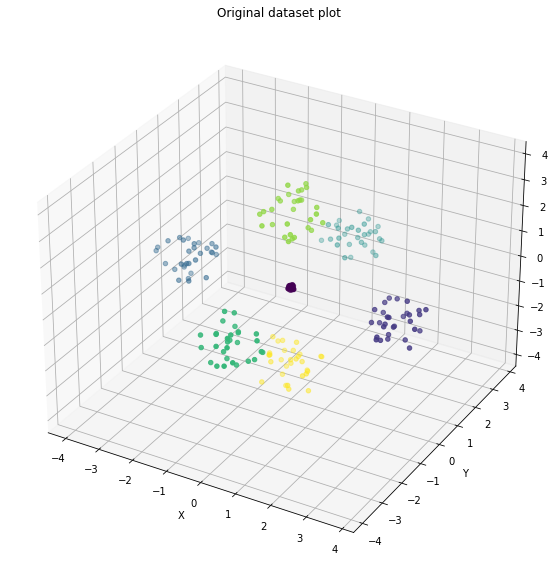

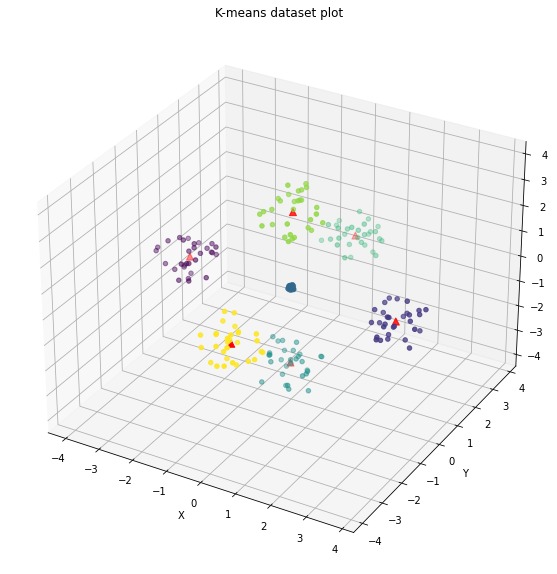

**********************************************************************
Dataset 2
Centroids: [[3.04451388 0.51152101 0.48663013]
 [1.0118234  0.75530155 0.5346417 ]
 [2.9348529  2.55931128 2.55146488]
 [1.1534002  4.08301554 1.04313881]]
Accuracy value: 0.5222772277227723
F1_score: 0.5222772277227723


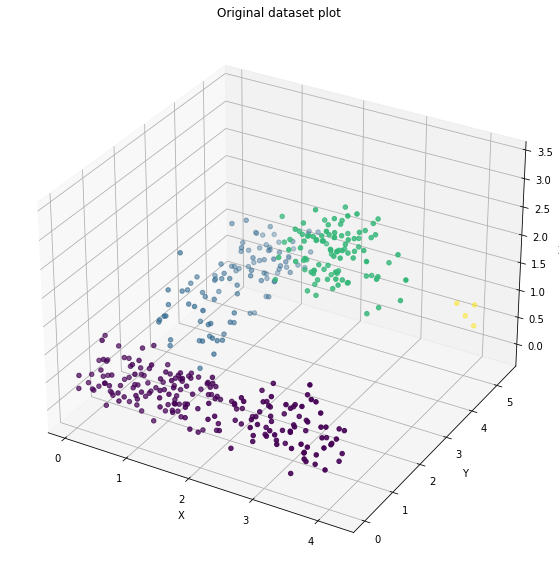

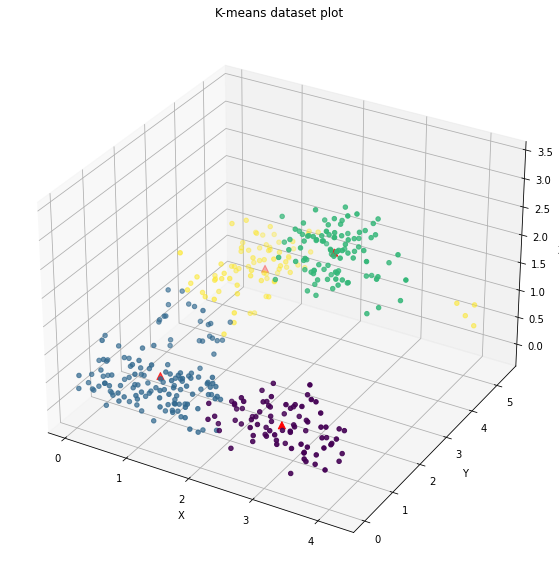

**********************************************************************
Dataset 3
Centroids: [[-0.51838252  1.0347351  -0.42573357]
 [-0.51838252 -1.16526495 -0.42573357]
 [ 1.3868734  -0.06526492 -0.42573357]
 [ 0.11670268 -0.06526492  1.37055896]]
Accuracy value: 0.25
F1_score: 0.25


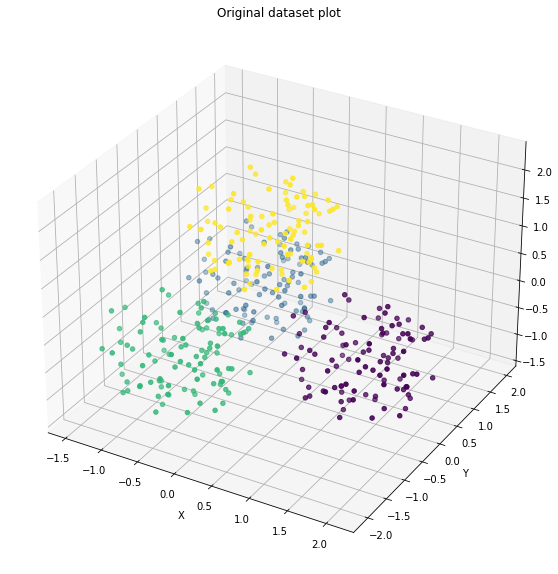

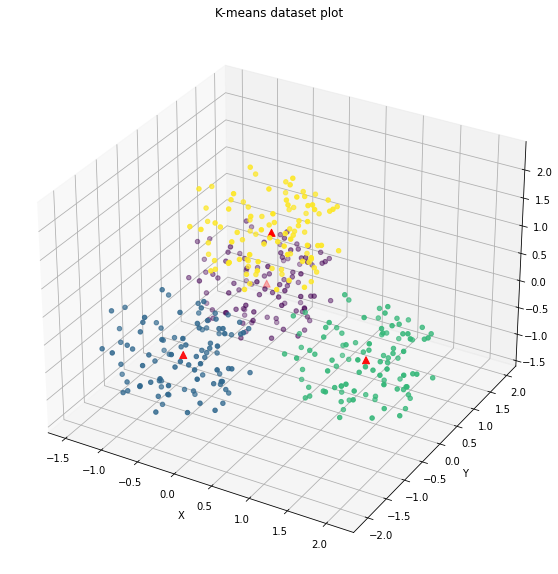

**********************************************************************
Dataset 4
Centroids: [[ 0.0027069   1.15233068 -0.02418346]
 [-0.01856012 -0.29844999  0.00854622]]
Accuracy value: 0.347
F1_score: 0.347


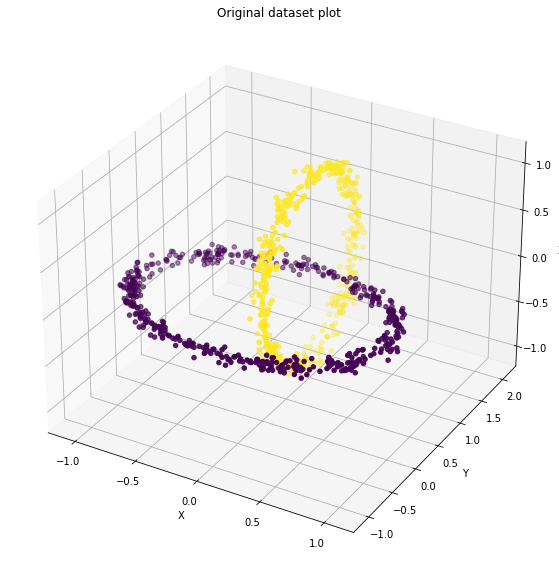

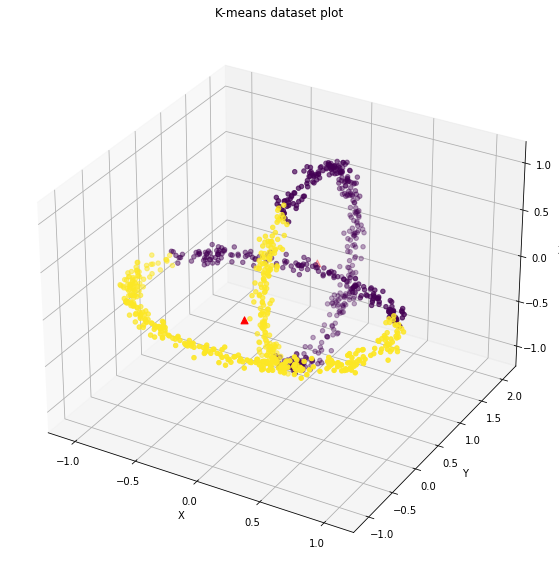

**********************************************************************
Dataset 5
Centroids: [[-8.14936453 -3.50308832 33.9470259 ]
 [ 1.48350975 -0.20452403 -8.38222825]]
Accuracy value: 0.7175
F1_score: 0.7175


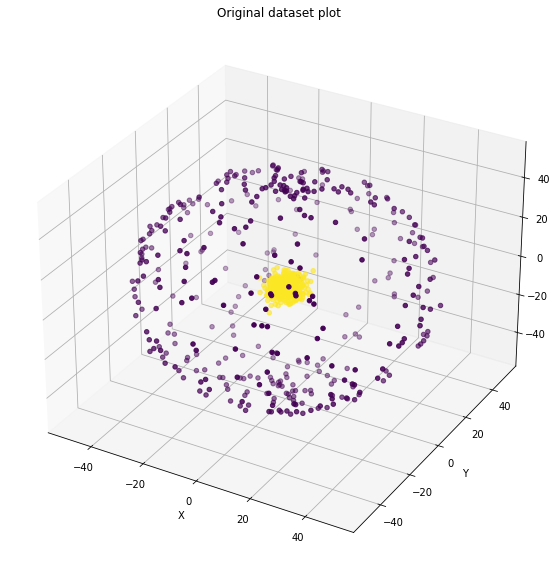

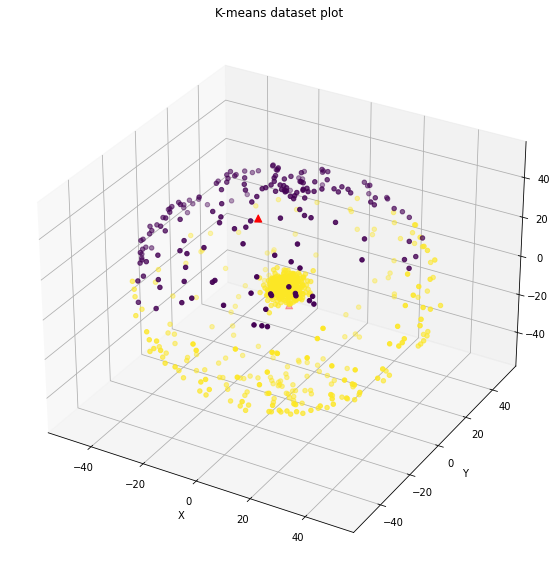

**********************************************************************
Dataset 6
Centroids: [[1.97625681 2.95135092]
 [0.50479557 0.33897749]]
Accuracy value: 0.951416015625
F1_score: 0.951416015625


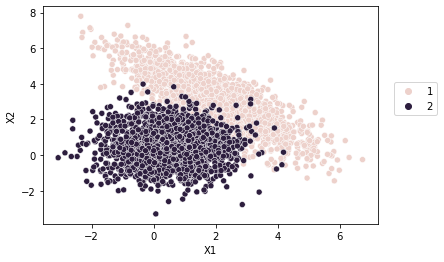

<Figure size 1080x720 with 0 Axes>

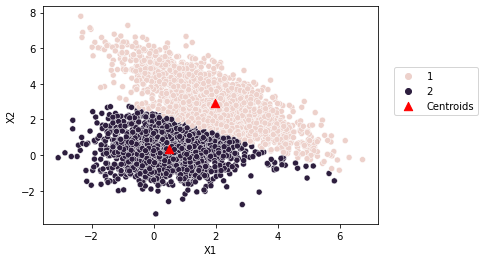

<Figure size 1080x720 with 0 Axes>

**********************************************************************
Dataset 7
Centroids: [[-1.23591695 -1.22097311]
 [ 0.81593719  1.53531881]
 [ 0.74612417 -1.63909829]
 [-1.33997473  1.10911429]
 [ 0.00909089 -0.02326302]
 [ 1.6670952  -0.17876499]]
Accuracy value: 0.1012987012987013
F1_score: 0.1012987012987013


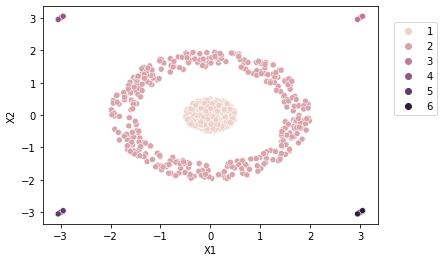

<Figure size 1080x720 with 0 Axes>

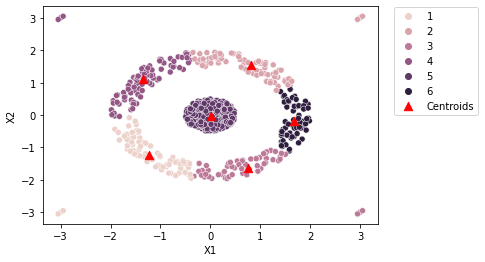

<Figure size 1080x720 with 0 Axes>

**********************************************************************
Dataset 8
Centroids: [[-3.82922219e-18 -3.80581512e-18 -6.39640487e-16]]
Accuracy value: 1.0
F1_score: 1.0


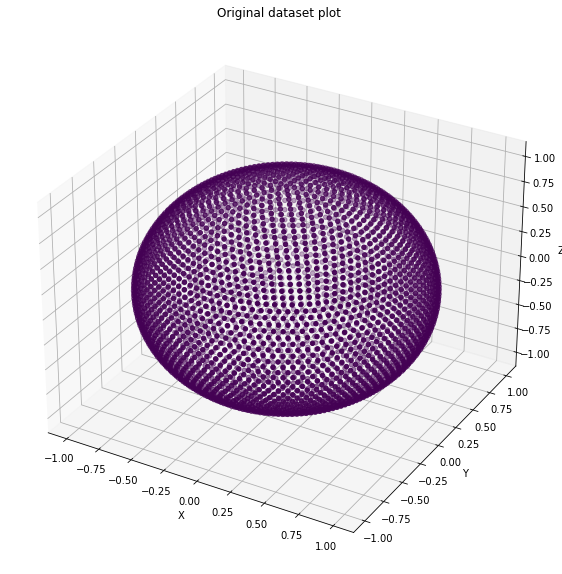

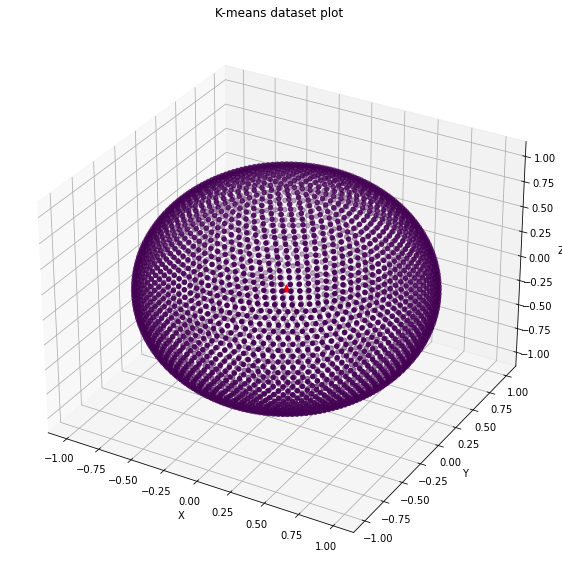

**********************************************************************


In [5]:
for i in range (1,9):
    print(f'Dataset {i}')
    k_means_clustering(f'Data{i}.csv') # Applying K means clustering on all the datasets in a for loop
    print('*'*70)

## Use Hierarchical clustering method

In [6]:
#importing the required libraries
import scipy.cluster.hierarchy as sch
import sklearn.cluster as sc
from sklearn.cluster import AgglomerativeClustering

In [7]:
### 1. Using Hierarchical clustering method to generate clusters

# Taking every data point as a separate cluster. And then repeatedly identifying the 2 clusters which are closest together,
# and Merging the 2 maximum comparable clusters.

def hierarchial_clustering(filename):
    
    df = pd.read_csv(filename) # Reading the data file
    k = df['Class'].nunique()  # to calculate the number of clusters using the "Class" columns
    data = df.iloc[:, 1:-1]    # Taking the column needed by removing the first & last column
    
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward',compute_distances=True)  
    
    pred = cluster.fit_predict(data) # Predict cluster index for each data point
    pred += 1

    
    ### 2. Evaluate the performace of the clustering algorithm using external validation metrics
    
    # Use Accuray metrics
    accuracy = sum(pred == df["Class"]) / len(pred)
    print('Accuracy value:', accuracy)
    
    # Use F1-score (Formula we have mentioned in K-means section above)
    f1 = f1_score(df['Class'], pred, average='micro')
    print('F1_score:', f1)


    ### 3. Plot the data points for each dataset and color them according to the class allocated by the clustering algorithm.

    # Scatter Plot for Hierarchical Clustering
    print(f'Hierarchical Plot for Dataset {i}')
    # If the data points have 2 dimensions, we plot 2D scatterplot. If the data points have 3 dimensions, we plot 3D scatterplot.
    if (df.shape[1] -2)== 2: # Checking if there are 2 columns to create a 2D graph
        sns.scatterplot(x = df.iloc[:,1], y = df.iloc[:,2], hue = pred) # Plotting the clusters in a scatter plot
        
        plt.legend(loc = (1.05,0.5))
        plt.figure(figsize = (15,10))
        plt.show()
    else: # Checking if there are 3 columns to create a 3D graph
        fig = plt.figure(figsize = (15, 10)) # setting the figure size
        ax = plt.axes(projection ="3d")

        # Taking the columns in seperate arrays to create the scatter plot
        x = df.iloc[:,1]
        y = df.iloc[:,2]
        z = df.iloc[:,3]
        
        # Creating the 3D plot
        ax.scatter3D(x,y,z, c = pred)

        # setting the labels & title for the plot
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.title("Hierarchical dataset plot")
        plt.show()


    ### 4. Plot dendrogram 
    print(f'Dendogram for Dataset {i}')
    linked = sch.linkage(data.values,'ward',metric='euclidean') 

    plt.figure(figsize=(15, 9)) # setting the figure size

    sch.dendrogram(linked,
                orientation='top',
                distance_sort='descending',
                show_leaf_counts=True) # Creating the dendogram 
    
    plt.xlabel('Clusters')
    plt.ylabel('Euclidean Distance')
    
    plt.show()


Dataset 1
Accuracy value: 0.14150943396226415
F1_score: 0.14150943396226415
Hierarchical Plot for Dataset 1


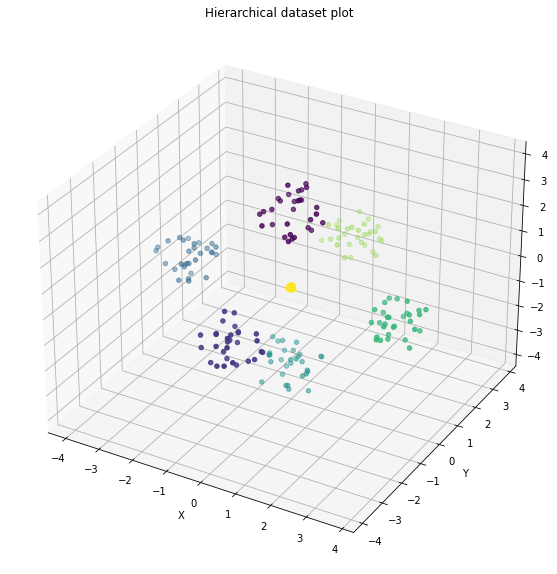

Dendogram for Dataset 1


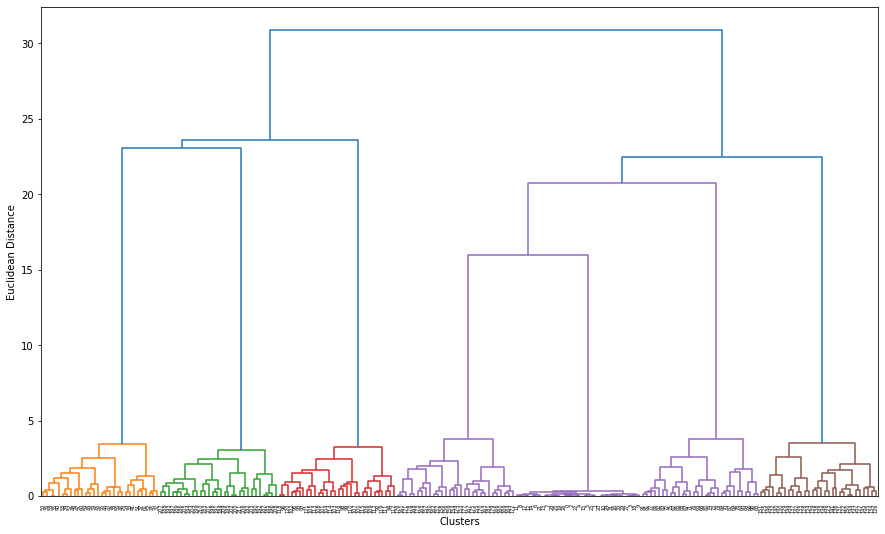

**********************************************************************
Dataset 2
Accuracy value: 0.24752475247524752
F1_score: 0.24752475247524752
Hierarchical Plot for Dataset 2


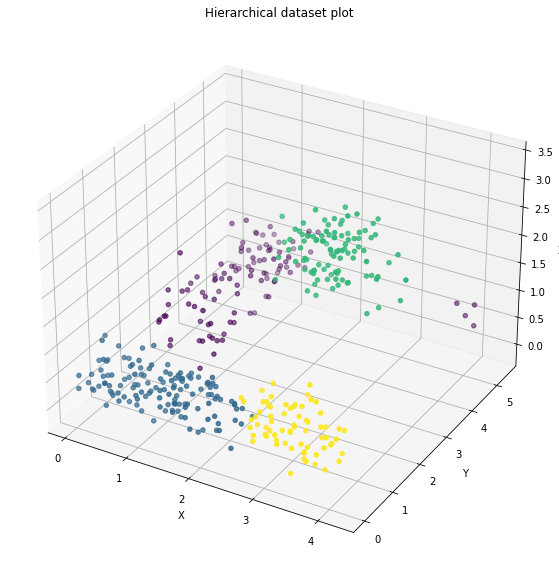

Dendogram for Dataset 2


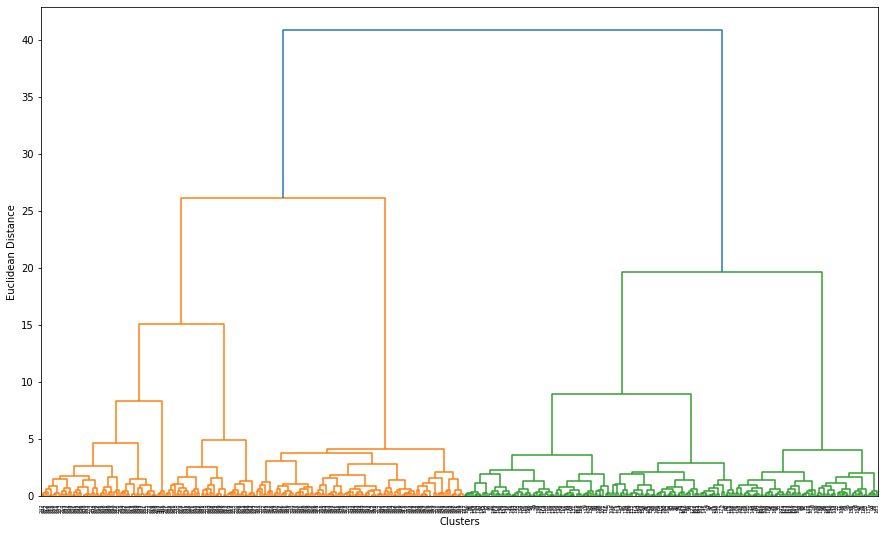

**********************************************************************
Dataset 3
Accuracy value: 0.0
F1_score: 0.0
Hierarchical Plot for Dataset 3


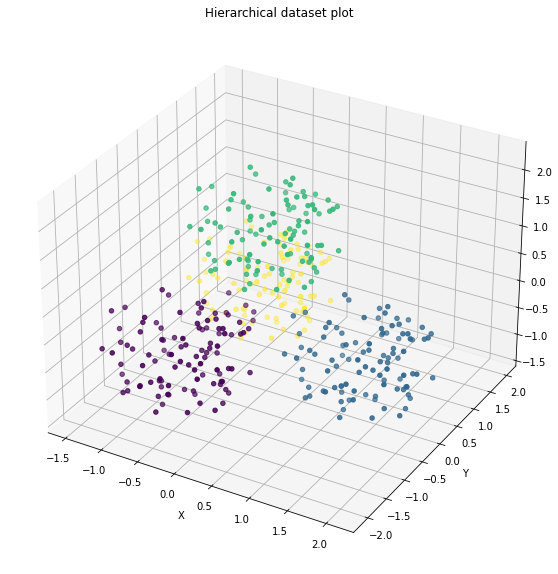

Dendogram for Dataset 3


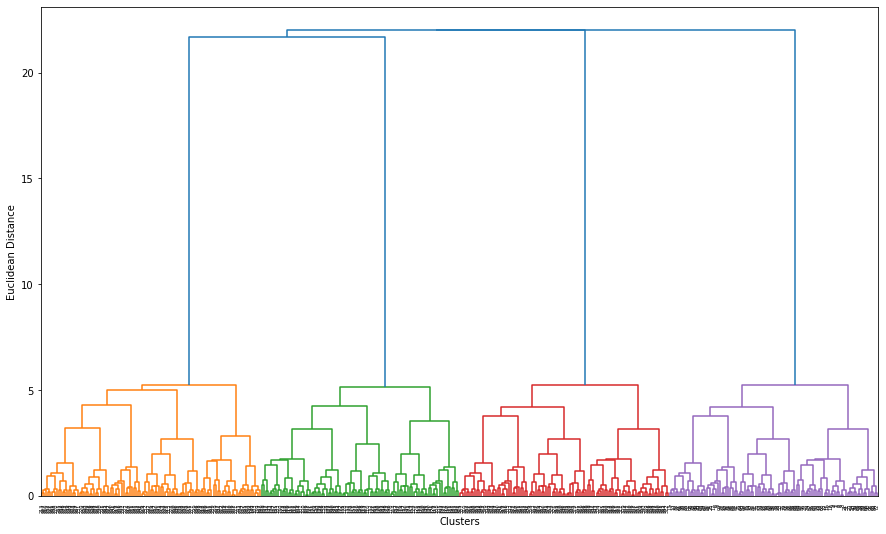

**********************************************************************
Dataset 4
Accuracy value: 0.201
F1_score: 0.201
Hierarchical Plot for Dataset 4


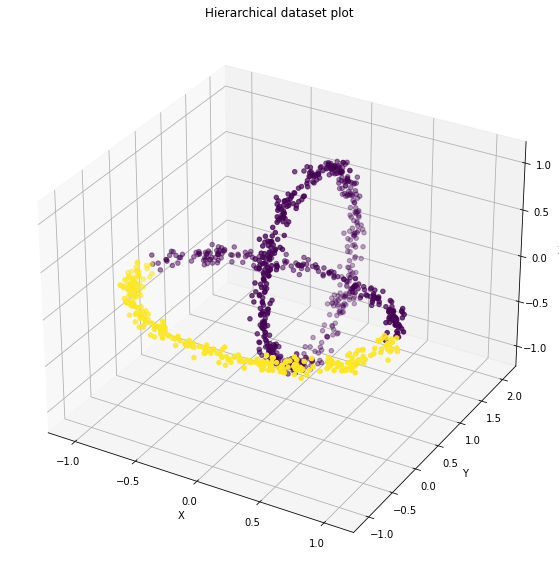

Dendogram for Dataset 4


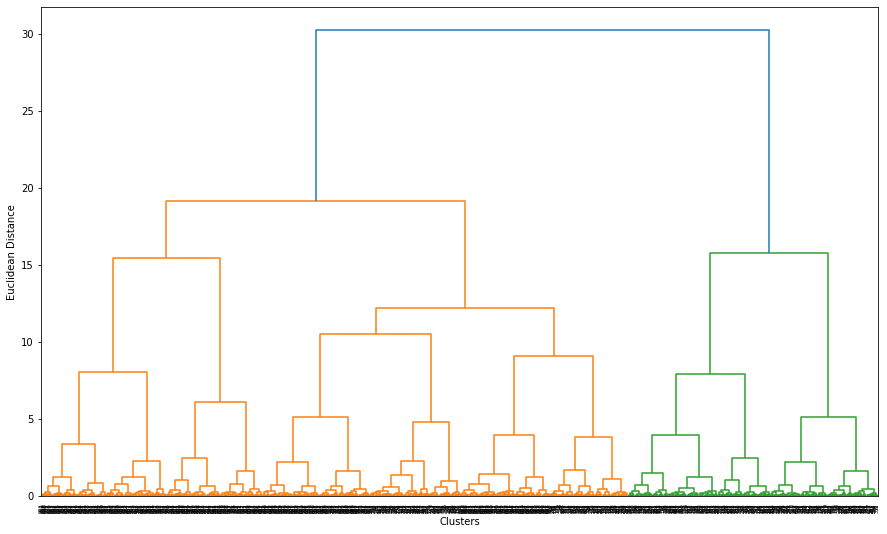

**********************************************************************
Dataset 5
Accuracy value: 0.3425
F1_score: 0.3425
Hierarchical Plot for Dataset 5


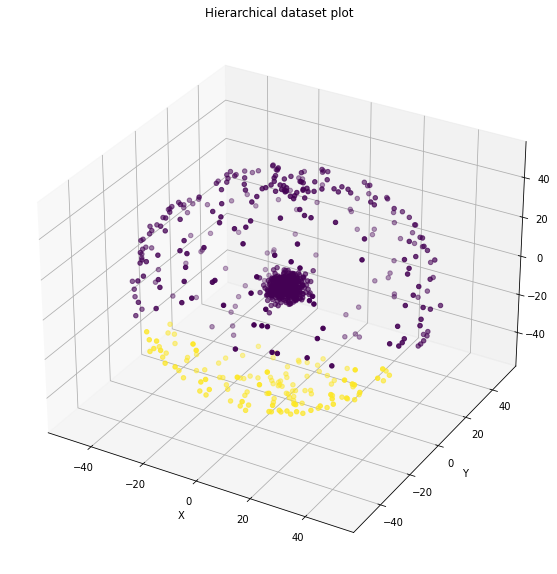

Dendogram for Dataset 5


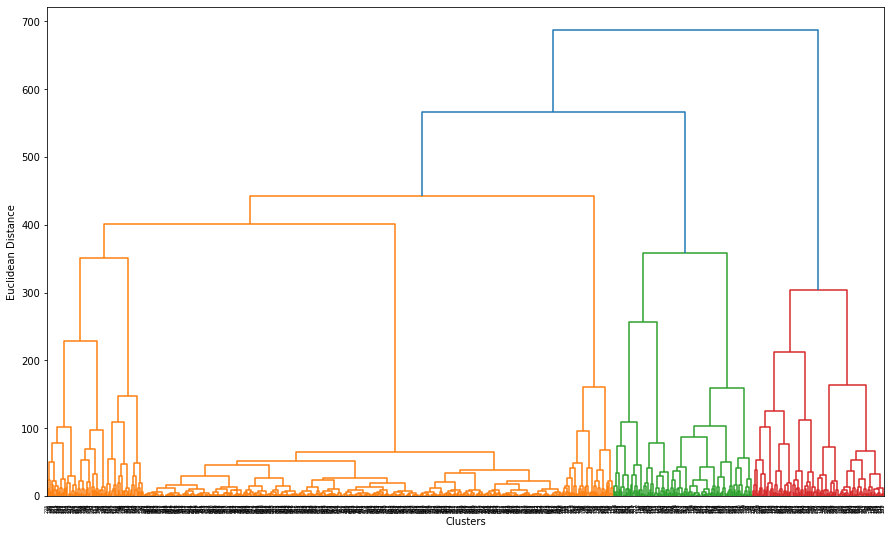

**********************************************************************
Dataset 6
Accuracy value: 0.923828125
F1_score: 0.923828125
Hierarchical Plot for Dataset 6


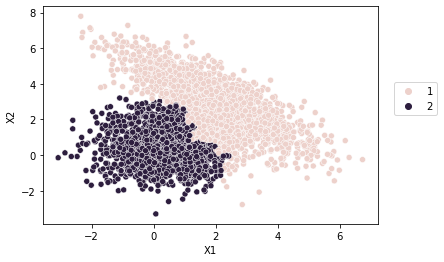

<Figure size 1080x720 with 0 Axes>

Dendogram for Dataset 6


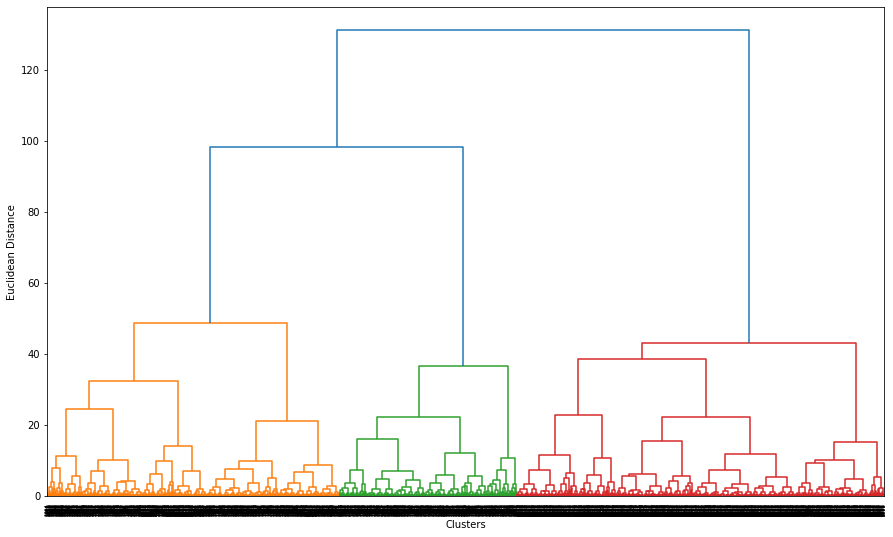

**********************************************************************
Dataset 7
Accuracy value: 0.1
F1_score: 0.10000000000000002
Hierarchical Plot for Dataset 7


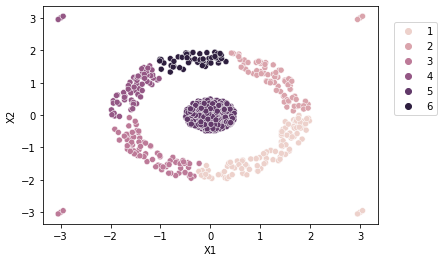

<Figure size 1080x720 with 0 Axes>

Dendogram for Dataset 7


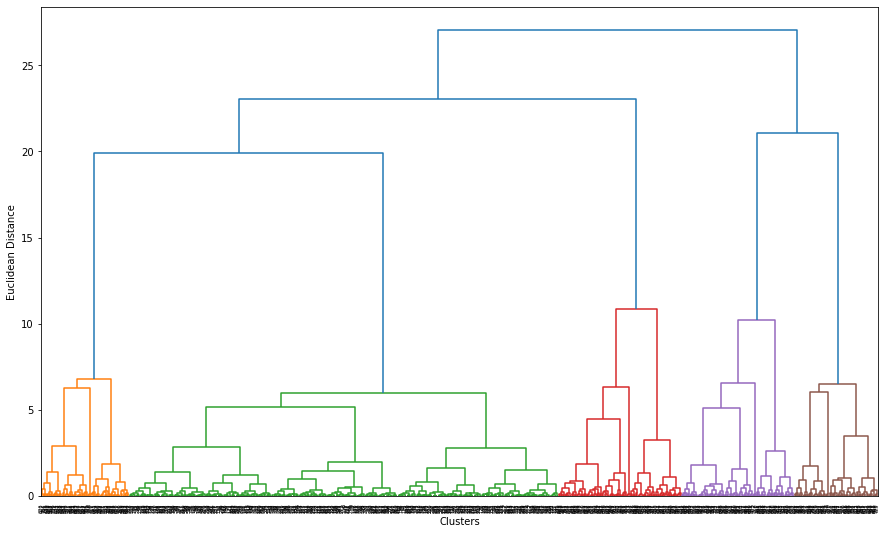

**********************************************************************
Dataset 8
Accuracy value: 1.0
F1_score: 1.0
Hierarchical Plot for Dataset 8


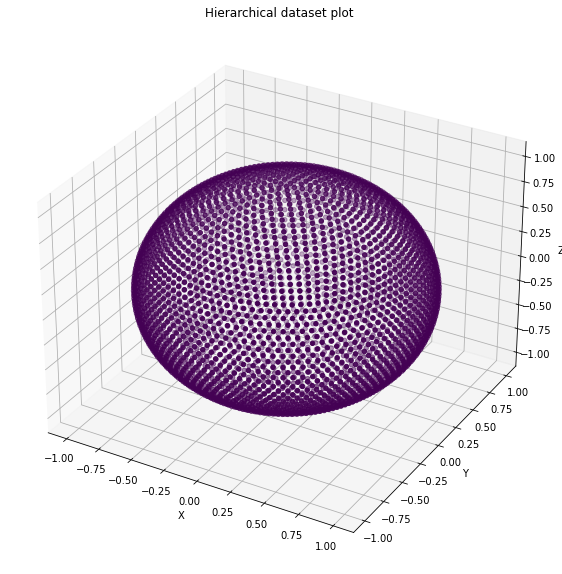

Dendogram for Dataset 8


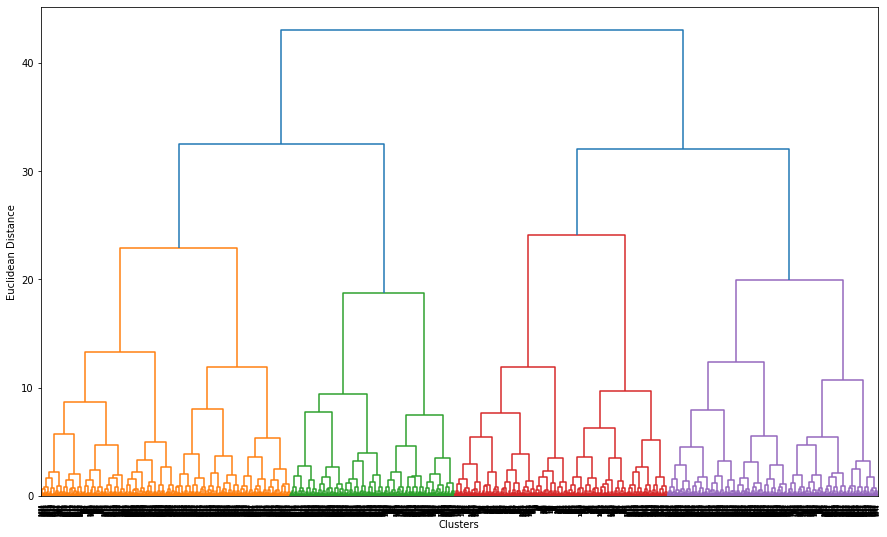

**********************************************************************


In [8]:
for i in range (1,9):
    print(f'Dataset {i}')
    hierarchial_clustering(f'Data{i}.csv') # Applying K means clustering on all the datasets in a for loop
    print('*'*70)
    
    

# Task 2

**Importing neccessary libraries which we use for Task 2**

In [94]:
# Data analysis and cleaning
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Machine Learning
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score




**Data Acquiring**

In [95]:
world_indicators = pd.read_csv('World Indicators.csv')
world_indicators.head()

Birth Rate Business Tax Rate  Days to Start Business  Energy Usage  \
0       0.025             72.0%                    25.0       41852.0   
1       0.046             52.1%                    66.0       13576.0   
2       0.037             65.9%                    29.0        3761.0   
3       0.024             19.5%                    60.0        2215.0   
4       0.042             43.5%                    13.0           NaN   

                GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0  $199,070,864,638             0.044              $233            451.0   
1  $104,115,863,405             0.034              $178            282.0   
2    $7,294,900,431             0.045               $34            270.0   
3   $15,292,424,757             0.052              $404            152.0   
4   $10,395,757,480             0.064               $39            270.0   

   Infant Mortality Rate  Internet Usage  Lending Interest  \
0                  0.023             0.1             0.080   
1                  0.107             0.1             0.188   
2                  0.060             0.0               NaN   
3                  0.039             0.1             0.110   
4                  0.068             0.0               NaN   

   Life Expectancy Female  Life Expectancy Male  Mobile Phone Usage  \
0                    72.0                  69.0                 0.9   
1                    53.0                  50.0                 0.5   
2                    60.0                  58.0                 0.8   
3                    46.0                  47.0                 1.5   
4                    56.0                  55.0                 0.5   

   Population 0-14  Population 15-64  Population 65+  Population Urban  \
0            0.272             0.681           0.047             0.682   
1            0.477             0.499           0.024             0.409   
2            0.432             0.539           0.029             0.423   
3            0.340             0.625           0.035             0.565   
4            0.458             0.517           0.025             0.265   

   Region       Country  
0  Africa       Algeria  
1  Africa        Angola  
2  Africa         Benin  
3  Africa      Botswana  
4  Africa  Burkina Faso

**Data Cleaning**

Find the number of observations and the number of attributes in the dataset

In [96]:
world_indicators.shape

(208, 20)

Get the type of each feature

In [97]:
world_indicators.dtypes

Birth Rate                float64
Business Tax Rate          object
Days to Start Business    float64
Energy Usage              float64
GDP                        object
Health Exp % GDP          float64
Health Exp/Capita          object
Hours to do Tax           float64
Infant Mortality Rate     float64
Internet Usage            float64
Lending Interest          float64
Life Expectancy Female    float64
Life Expectancy Male      float64
Mobile Phone Usage        float64
Population 0-14           float64
Population 15-64          float64
Population 65+            float64
Population Urban          float64
Region                     object
Country                    object
dtype: object

Get the percentage of missing values to see which feature has the significant percentage of missing values, so we can just drop them

In [98]:
tmp = world_indicators.isna().sum()/len(world_indicators)*100 
tmp.map(lambda x: f"{round(x, 2)}%" )

Birth Rate                 4.33%
Business Tax Rate         12.98%
Days to Start Business    12.98%
Energy Usage              34.62%
GDP                        9.62%
Health Exp % GDP          11.06%
Health Exp/Capita         11.06%
Hours to do Tax           13.46%
Infant Mortality Rate      9.62%
Internet Usage             4.33%
Lending Interest          37.02%
Life Expectancy Female     5.29%
Life Expectancy Male       5.29%
Mobile Phone Usage         5.77%
Population 0-14            8.17%
Population 15-64           8.17%
Population 65+             8.17%
Population Urban           0.96%
Region                      0.0%
Country                     0.0%
dtype: object

We can see the percentage of missing values in `Energy Usage` and `Lending Usage` are high (around 35% to 37%). So we will drop these two columns


In [99]:
world_indicators.drop(columns = ['Energy Usage', 'Lending Interest'], inplace = True)
world_indicators

Birth Rate Business Tax Rate  Days to Start Business  \
0         0.025             72.0%                    25.0   
1         0.046             52.1%                    66.0   
2         0.037             65.9%                    29.0   
3         0.024             19.5%                    60.0   
4         0.042             43.5%                    13.0   
..          ...               ...                     ...   
203         NaN               NaN                     NaN   
204       0.013             46.5%                     5.0   
205       0.015             41.9%                     7.0   
206       0.020             62.8%                   141.0   
207       0.011               NaN                     NaN   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,864,638             0.044              $233            451.0   
1       $104,115,863,405             0.034              $178            282.0   
2         $7,294,900,431             0.045               $34            270.0   
3        $15,292,424,757             0.052              $404            152.0   
4        $10,395,757,480             0.064               $39            270.0   
..                   ...               ...               ...              ...   
203                  NaN               NaN               NaN              NaN   
204  $15,533,800,000,000             0.177            $8,467            187.0   
205      $47,236,710,623             0.088            $1,213            336.0   
206     $316,482,176,579             0.045              $487            864.0   
207                  NaN               NaN               NaN              NaN   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                    0.023             0.1                    72.0   
1                    0.107             0.1                    53.0   
2                    0.060             0.0                    60.0   
3                    0.039             0.1                    46.0   
4                    0.068             0.0                    56.0   
..                     ...             ...                     ...   
203                    NaN             NaN                     NaN   
204                  0.006             0.7                    81.0   
205                  0.010             0.5                    80.0   
206                  0.014             0.4                    77.0   
207                    NaN             0.4                    83.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                    69.0                 0.9            0.272   
1                    50.0                 0.5            0.477   
2                    58.0                 0.8            0.432   
3                    47.0                 1.5            0.340   
4                    55.0                 0.5            0.458   
..                    ...                 ...              ...   
203                   NaN                 NaN              NaN   
204                  76.0                 0.9            0.197   
205                  73.0                 1.4            0.223   
206                  71.0                 1.0            0.291   
207                  76.0                 NaN            0.206   

     Population 15-64  Population 65+  Population Urban        Region  \
0               0.681           0.047             0.682        Africa   
1               0.499           0.024             0.409        Africa   
2               0.539           0.029             0.423        Africa   
3               0.625           0.035             0.565        Africa   
4               0.517           0.025             0.265        Africa   
..                ...             ...               ...           ...   
203               NaN             NaN             0.907  The Americas   
204             0.669           0.133             0.809  The Americas   
205     

Because the percentage of missing values in other columns is not significant, we continue dropping observations which have missing values from the dataset

In [100]:
world_indicators.dropna(inplace = True)
world_indicators

Birth Rate Business Tax Rate  Days to Start Business  \
0         0.025             72.0%                    25.0   
1         0.046             52.1%                    66.0   
2         0.037             65.9%                    29.0   
3         0.024             19.5%                    60.0   
4         0.042             43.5%                    13.0   
..          ...               ...                     ...   
201       0.018             27.9%                   694.0   
202       0.015             29.1%                    41.0   
204       0.013             46.5%                     5.0   
205       0.015             41.9%                     7.0   
206       0.020             62.8%                   141.0   

                     GDP  Health Exp % GDP Health Exp/Capita  Hours to do Tax  \
0       $199,070,864,638             0.044              $233            451.0   
1       $104,115,863,405             0.034              $178            282.0   
2         $7,294,900,431             0.045               $34            270.0   
3        $15,292,424,757             0.052              $404            152.0   
4        $10,395,757,480             0.064               $39            270.0   
..                   ...               ...               ...              ...   
201       $4,363,219,094             0.060              $490            199.0   
202      $23,676,348,287             0.053              $935            210.0   
204  $15,533,800,000,000             0.177            $8,467            187.0   
205      $47,236,710,623             0.088            $1,213            336.0   
206     $316,482,176,579             0.045              $487            864.0   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                    0.023             0.1                    72.0   
1                    0.107             0.1                    53.0   
2                    0.060             0.0                    60.0   
3                    0.039             0.1                    46.0   
4                    0.068             0.0                    56.0   
..                     ...             ...                     ...   
201                  0.022             0.3                    74.0   
202                  0.020             0.6                    73.0   
204                  0.006             0.7                    81.0   
205                  0.010             0.5                    80.0   
206                  0.014             0.4                    77.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                    69.0                 0.9            0.272   
1                    50.0                 0.5            0.477   
2                    58.0                 0.8            0.432   
3                    47.0                 1.5            0.340   
4                    55.0                 0.5            0.458   
..                    ...                 ...              ...   
201                  67.0                 1.0            0.283   
202                  66.0                 1.4            0.207   
204                  76.0                 0.9            0.197   
205                  73.0                 1.4            0.223   
206                  71.0                 1.0            0.291   

     Population 15-64  Population 65+  Population Urban        Region  \
0               0.681           0.047             0.682        Africa   
1               0.499           0.024             0.409        Africa   
2               0.539           0.029             0.423        Africa   
3               0.625           0.035             0.565        Africa   
4               0.517           0.025             0.265        Africa   
..                ...             ...               ...           ...   
201             0.652           0.065             0.663  The Americas   
202             0.708           0.085             0.089  The Americas   
204     

Remove all duplicated observations from the dataset

In [101]:
world_indicators.drop_duplicates(inplace = True)
world_indicators.head()

Birth Rate Business Tax Rate  Days to Start Business               GDP  \
0       0.025             72.0%                    25.0  $199,070,864,638   
1       0.046             52.1%                    66.0  $104,115,863,405   
2       0.037             65.9%                    29.0    $7,294,900,431   
3       0.024             19.5%                    60.0   $15,292,424,757   
4       0.042             43.5%                    13.0   $10,395,757,480   

   Health Exp % GDP Health Exp/Capita  Hours to do Tax  Infant Mortality Rate  \
0             0.044              $233            451.0                  0.023   
1             0.034              $178            282.0                  0.107   
2             0.045               $34            270.0                  0.060   
3             0.052              $404            152.0                  0.039   
4             0.064               $39            270.0                  0.068   

   Internet Usage  Life Expectancy Female  Life Expectancy Male  \
0             0.1                    72.0                  69.0   
1             0.1                    53.0                  50.0   
2             0.0                    60.0                  58.0   
3             0.1                    46.0                  47.0   
4             0.0                    56.0                  55.0   

   Mobile Phone Usage  Population 0-14  Population 15-64  Population 65+  \
0                 0.9            0.272             0.681           0.047   
1                 0.5            0.477             0.499           0.024   
2                 0.8            0.432             0.539           0.029   
3                 1.5            0.340             0.625           0.035   
4                 0.5            0.458             0.517           0.025   

   Population Urban  Region       Country  
0             0.682  Africa       Algeria  
1             0.409  Africa        Angola  
2             0.423  Africa         Benin  
3             0.565  Africa      Botswana  
4             0.265  Africa  Burkina Faso

Since `Business Tax Rate`, `GDP` and `Health Exp/Capita` features contains special characters such as `$, %` and are stored as object, we will remove those special characters and change them to float values.


In [102]:
world_indicators['Business Tax Rate'] = world_indicators['Business Tax Rate'].replace('[\%,]', '', regex = True).astype(float)
world_indicators['GDP'] = world_indicators['GDP'].replace('[\$,]', '', regex = True).astype(float)
world_indicators['Health Exp/Capita'] = world_indicators['Health Exp/Capita'].replace('[\$,]', '', regex = True).astype(float)
world_indicators

Birth Rate  Business Tax Rate  Days to Start Business           GDP  \
0         0.025               72.0                    25.0  1.990709e+11   
1         0.046               52.1                    66.0  1.041159e+11   
2         0.037               65.9                    29.0  7.294900e+09   
3         0.024               19.5                    60.0  1.529242e+10   
4         0.042               43.5                    13.0  1.039576e+10   
..          ...                ...                     ...           ...   
201       0.018               27.9                   694.0  4.363219e+09   
202       0.015               29.1                    41.0  2.367635e+10   
204       0.013               46.5                     5.0  1.553380e+13   
205       0.015               41.9                     7.0  4.723671e+10   
206       0.020               62.8                   141.0  3.164822e+11   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0               0.044              233.0            451.0   
1               0.034              178.0            282.0   
2               0.045               34.0            270.0   
3               0.052              404.0            152.0   
4               0.064               39.0            270.0   
..                ...                ...              ...   
201             0.060              490.0            199.0   
202             0.053              935.0            210.0   
204             0.177             8467.0            187.0   
205             0.088             1213.0            336.0   
206             0.045              487.0            864.0   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                    0.023             0.1                    72.0   
1                    0.107             0.1                    53.0   
2                    0.060             0.0                    60.0   
3                    0.039             0.1                    46.0   
4                    0.068             0.0                    56.0   
..                     ...             ...                     ...   
201                  0.022             0.3                    74.0   
202                  0.020             0.6                    73.0   
204                  0.006             0.7                    81.0   
205                  0.010             0.5                    80.0   
206                  0.014             0.4                    77.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                    69.0                 0.9            0.272   
1                    50.0                 0.5            0.477   
2                    58.0                 0.8            0.432   
3                    47.0                 1.5            0.340   
4                    55.0                 0.5            0.458   
..                    ...                 ...              ...   
201                  67.0                 1.0            0.283   
202                  66.0                 1.4            0.207   
204                  76.0                 0.9            0.197   
205                  73.0                 1.4            0.223   
206                  71.0                 1.0            0.291   

     Population 15-64  Population 65+  Population Urban        Region  \
0               0.681           0.047             0.682        Africa   
1               0.499           0.024             0.409        Africa   
2               0.539           0.029             0.423        Africa   
3               0.625           0.035             0.565        Africa   
4               0.517           0.025             0.265        Africa   
..                ...             ...               ...           ...   
201             0.652           0.065             0.663  The Americas   
202             0.708           0.085             0.089  The Americas   
204             0.669           0.133             0.809  The America

The task requires grouping similar countries, so we will obtain the new dataset, which just include numerical attributes for analysis

In [103]:
world_happiness_ana = world_indicators.iloc[:, :16]
world_happiness_ana

Birth Rate  Business Tax Rate  Days to Start Business           GDP  \
0         0.025               72.0                    25.0  1.990709e+11   
1         0.046               52.1                    66.0  1.041159e+11   
2         0.037               65.9                    29.0  7.294900e+09   
3         0.024               19.5                    60.0  1.529242e+10   
4         0.042               43.5                    13.0  1.039576e+10   
..          ...                ...                     ...           ...   
201       0.018               27.9                   694.0  4.363219e+09   
202       0.015               29.1                    41.0  2.367635e+10   
204       0.013               46.5                     5.0  1.553380e+13   
205       0.015               41.9                     7.0  4.723671e+10   
206       0.020               62.8                   141.0  3.164822e+11   

     Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0               0.044              233.0            451.0   
1               0.034              178.0            282.0   
2               0.045               34.0            270.0   
3               0.052              404.0            152.0   
4               0.064               39.0            270.0   
..                ...                ...              ...   
201             0.060              490.0            199.0   
202             0.053              935.0            210.0   
204             0.177             8467.0            187.0   
205             0.088             1213.0            336.0   
206             0.045              487.0            864.0   

     Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0                    0.023             0.1                    72.0   
1                    0.107             0.1                    53.0   
2                    0.060             0.0                    60.0   
3                    0.039             0.1                    46.0   
4                    0.068             0.0                    56.0   
..                     ...             ...                     ...   
201                  0.022             0.3                    74.0   
202                  0.020             0.6                    73.0   
204                  0.006             0.7                    81.0   
205                  0.010             0.5                    80.0   
206                  0.014             0.4                    77.0   

     Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0                    69.0                 0.9            0.272   
1                    50.0                 0.5            0.477   
2                    58.0                 0.8            0.432   
3                    47.0                 1.5            0.340   
4                    55.0                 0.5            0.458   
..                    ...                 ...              ...   
201                  67.0                 1.0            0.283   
202                  66.0                 1.4            0.207   
204                  76.0                 0.9            0.197   
205                  73.0                 1.4            0.223   
206                  71.0                 1.0            0.291   

     Population 15-64  Population 65+  Population Urban  
0               0.681           0.047             0.682  
1               0.499           0.024             0.409  
2               0.539           0.029             0.423  
3               0.625           0.035             0.565  
4               0.517           0.025             0.265  
..                ...             ...               ...  
201             0.652           0.065             0.663  
202             0.708           0.085             0.089  
204             0.669           0.133             0.809  
205             0.638           0.139             0.946  
206             0.651           0.058             0.888  

[171 rows x 16 columns]

With this raw dataset, features are different in range of values. Some features whose values are very large such as GDP values, which will dominate other features. K-means and hierarchinal clustering will only look at these features for computing the distance, resulting in poor results. Normalization helps us cancel out the effect of these features. So, we will use the min/max scalling to scale values to `(0,1)`

In [104]:
mms = MinMaxScaler()
data_scaled = mms.fit_transform(world_happiness_ana)

data_scaled_df = pd.DataFrame(data_scaled,columns = world_happiness_ana.columns)
data_scaled_df.head()

Birth Rate  Business Tax Rate  Days to Start Business       GDP  \
0    0.404762           0.192319                0.034632  0.012804   
1    0.904762           0.132144                0.093795  0.006692   
2    0.690476           0.173874                0.040404  0.000459   
3    0.380952           0.033565                0.085137  0.000973   
4    0.809524           0.106138                0.017316  0.000658   

   Health Exp % GDP  Health Exp/Capita  Hours to do Tax  \
0          0.158228           0.022332         0.169629   
1          0.094937           0.016774         0.104328   
2          0.164557           0.002223         0.099691   
3          0.208861           0.039612         0.054096   
4          0.284810           0.002728         0.099691   

   Infant Mortality Rate  Internet Usage  Life Expectancy Female  \
0               0.190909        0.111111                0.658537   
1               0.954545        0.111111                0.195122   
2               0.527273        0.000000                0.365854   
3               0.336364        0.111111                0.024390   
4               0.600000        0.000000                0.268293   

   Life Expectancy Male  Mobile Phone Usage  Population 0-14  \
0              0.666667                0.45         0.381471   
1              0.138889                0.25         0.940054   
2              0.361111                0.40         0.817439   
3              0.055556                0.75         0.566757   
4              0.277778                0.25         0.888283   

   Population 15-64  Population 65+  Population Urban  
0          0.539267        0.188034          0.650933  
1          0.062827        0.089744          0.351262  
2          0.167539        0.111111          0.366630  
3          0.392670        0.136752          0.522503  
4          0.109948        0.094017          0.193194

Selecting the optimal number of clusters is the main and crucial part. In this task, we will use **Silhouette analysis** to find the optimal n_clusters based on Silhouette coefficient.

Computing Silhouette coefficient contains 3 steps:

- The average distance a(i) to all the examples in the same cluster is computed:
$a(i)=\frac{1}{\left|C_a\right|} \sum_{j \in C_a, i \neq j} d(i, j)$

- The minimum average distance b(i) between the example and the examples con- tained in each cluster not containing the analyzed example:
$b(i)=\min _{C_b \neq C_a} \frac{1}{\left|C_b\right|} \sum_{j \in C_b} d(i, j)$

- The silhouette coefficient is de- termined by the following expression:
$s(i)=\frac{b(i)-a(i)}{\max \{a(i), b(i)\}}$

-  The global silhouette coefficient is just the average of the particular silhouette coefficients for each example:
$S=\frac{1}{n} \sum_{i=1}^n s(i)$

Silhouette coefficient ranges between `−1 and 1`, where a higher silhouette coefficient refers to a model with more coherent clusters. In other words, silhouette coefficients close to +1 means the sample is far away from the neighboring clusters. A value of 0 means that the sample is on or very close to the decision boundary between two neighboring clusters. Finally, negative values indicate that the samples could have potentially been assigned to the wrong cluster.

In this task, we are actually varying the K from range of 2 to 10, and for each value of K, Silhouette coefficient is calculated. 

Once the plotting is done between K and Silhouette score, we will pick the optimal n_clusters with the highest Silhouette score.


For n_clusters = 2 The average silhoutte_score is: 0.42987453131766545
For n_clusters = 3 The average silhoutte_score is: 0.31754924762559267
For n_clusters = 4 The average silhoutte_score is: 0.26281157622770773
For n_clusters = 5 The average silhoutte_score is: 0.2445716026876617
For n_clusters = 6 The average silhoutte_score is: 0.24134022085153523
For n_clusters = 7 The average silhoutte_score is: 0.1997562463664335
For n_clusters = 8 The average silhoutte_score is: 0.1997541266232097
For n_clusters = 9 The average silhoutte_score is: 0.1843713611221024
For n_clusters = 10 The average silhoutte_score is: 0.18785939309736172


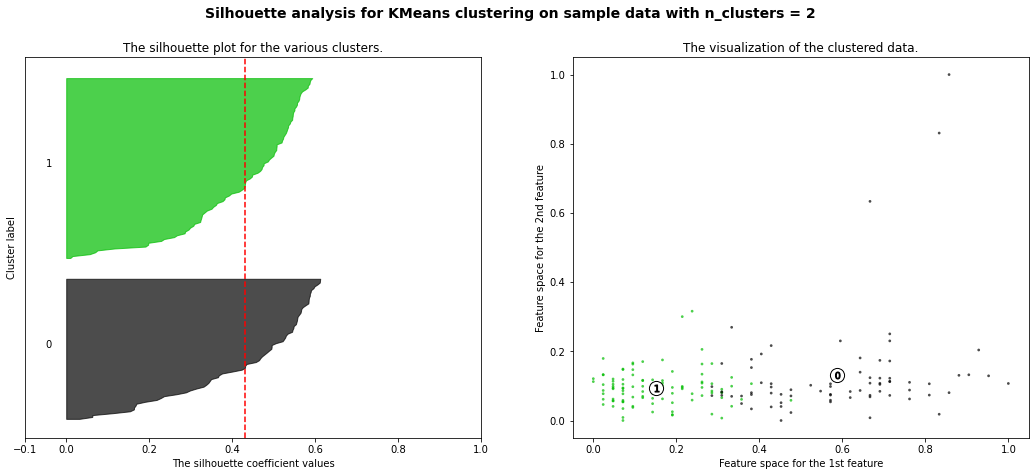

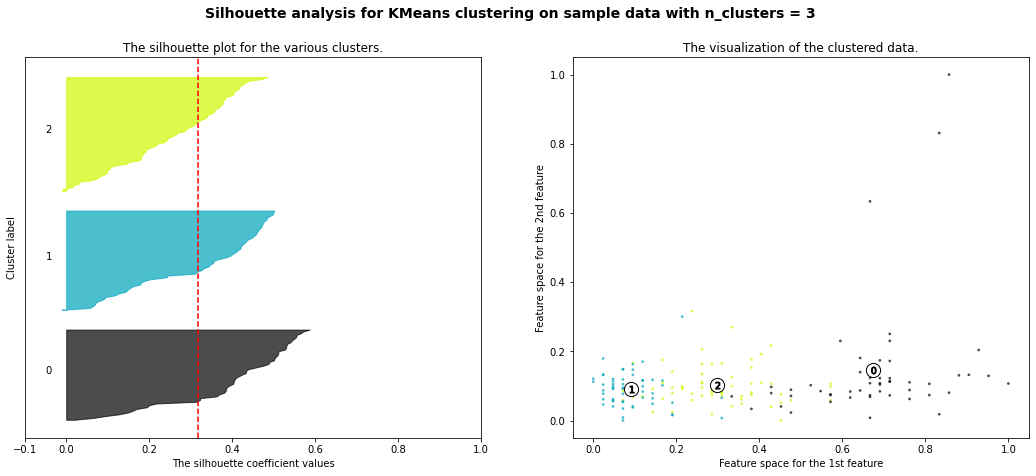

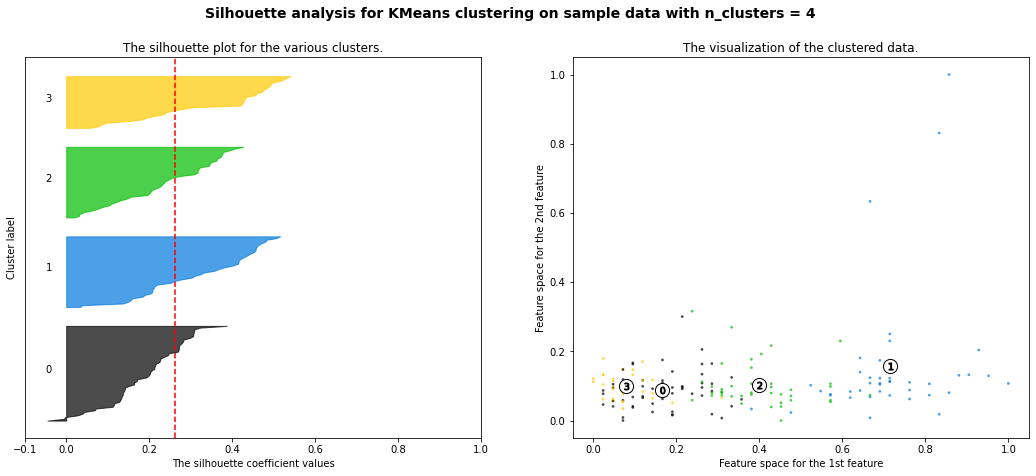

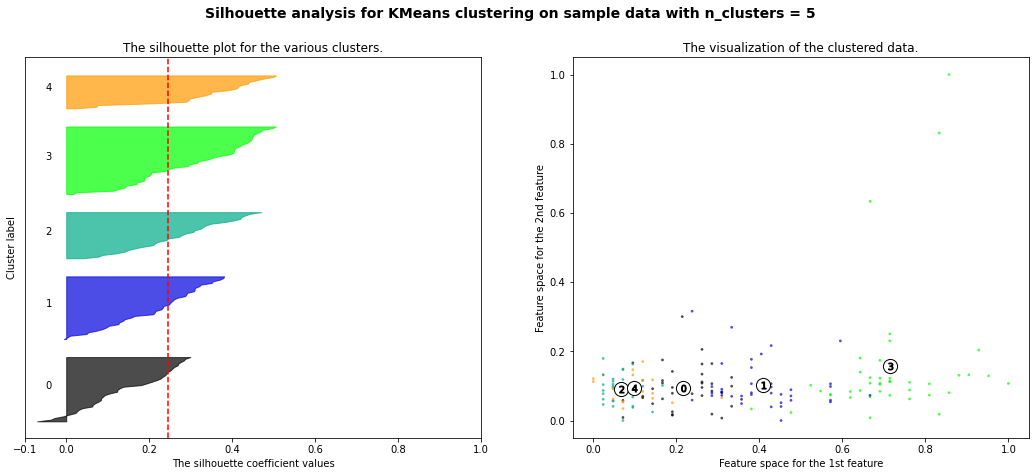

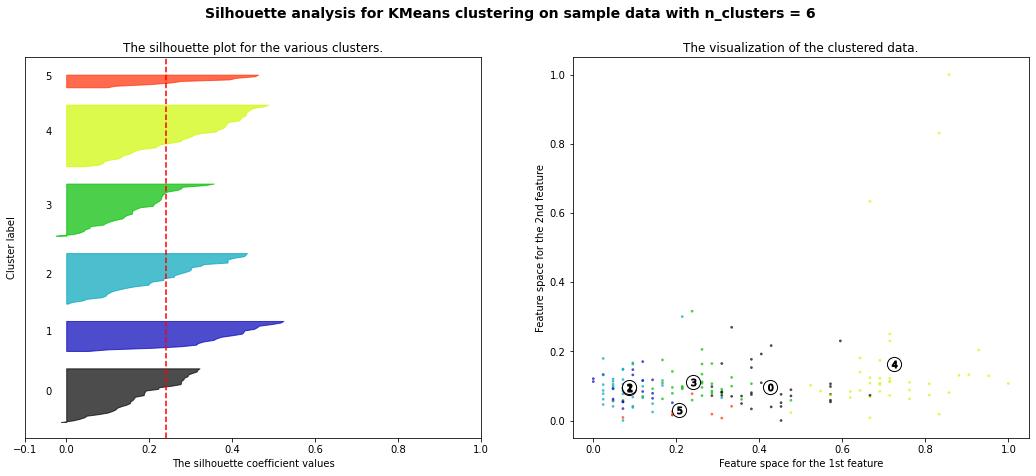

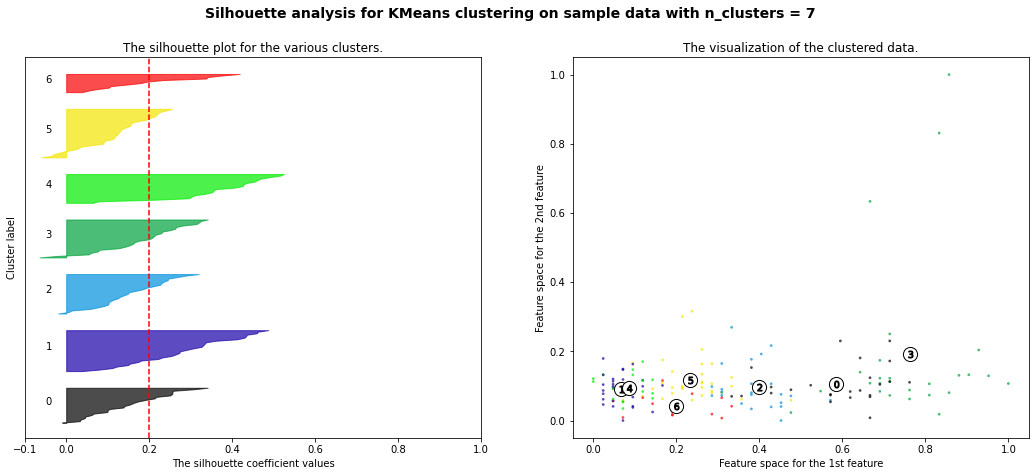

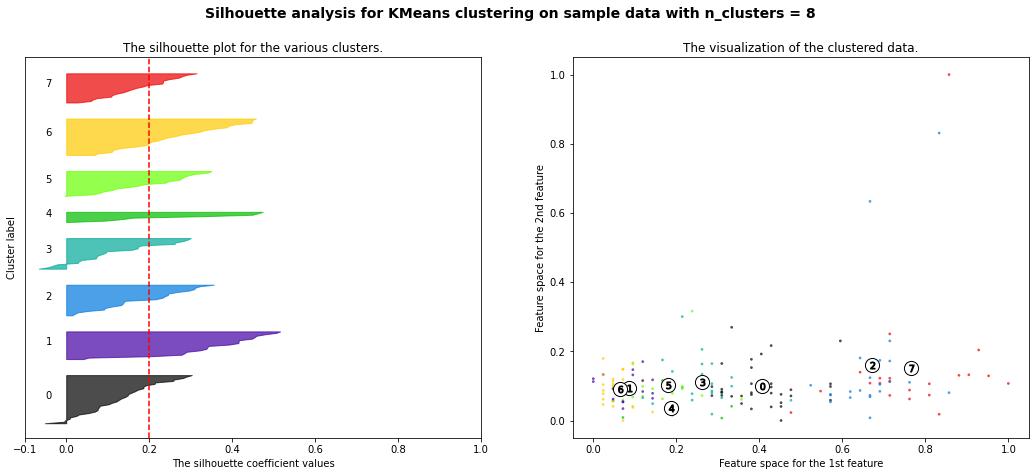

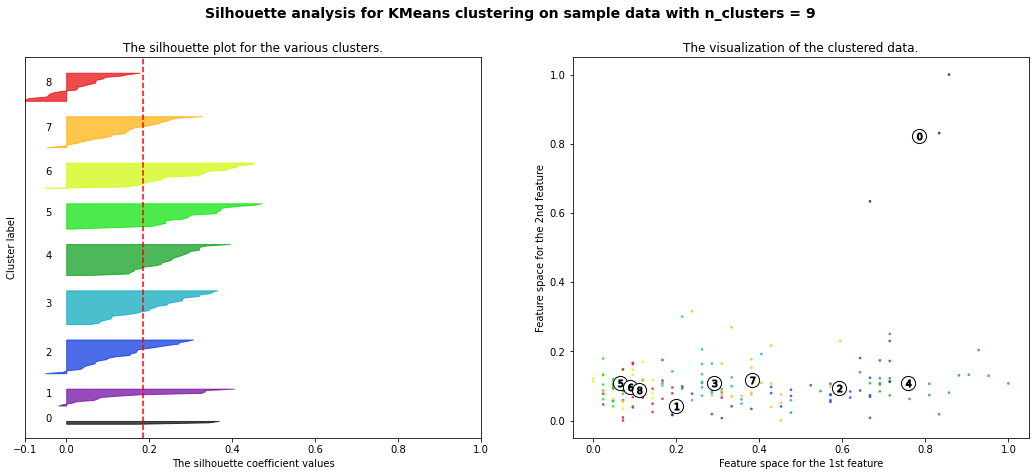

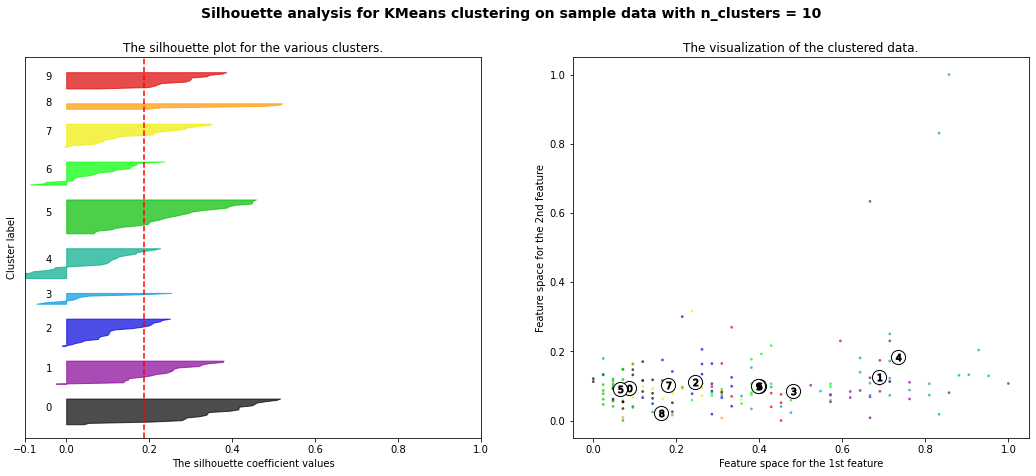

In [105]:
range_n_clusters = range(2,11)
silhouette_avg_for_plot = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled_df) + (n_clusters + 1) * 10])
    
    # Initialize the clusterer with n_clusters value and a random generator seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters = n_clusters, random_state = 10)
    cluster_labels = clusterer.fit_predict(data_scaled_df)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed clusters
    silhouette_avg= silhouette_score(data_scaled_df, cluster_labels)
    print('For n_clusters =', n_clusters, 'The average silhoutte_score is:', silhouette_avg)
    
    silhouette_avg_for_plot.append(silhouette_avg)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled_df, cluster_labels)
    
    
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
        
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_scaled_df.iloc[:, 0], data_scaled_df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    
    
    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


We will show the plot of Silhouette score for each K value

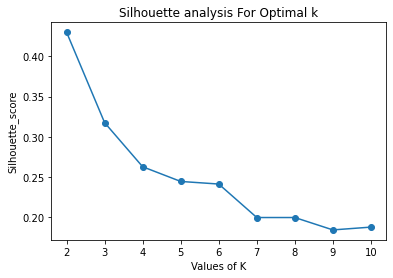

In [106]:
plt.plot(range_n_clusters,silhouette_avg_for_plot, marker = 'o')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette_score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

After doing Silhouette Analysis, we can see that Silhouette score is highest when k = 2. It means **the optimal number of clusters is 2**. 

**Now, we will use K-means clustering to group similar countries.The number of clusters will be picked randomly from 1 to 10 and we evaluate the K-means method by using CH value and Dunn Index Value.**

Next, we evaluate the cluster quality by  Dunn index (`DI value`), which is the ratio of the smallest distance be- tween data from different clusters and the largest distance between clusters.

**Calisnki-Harabasz coefficient** (`CH value`) is a measure based on the internal dispersion of clusters and the dispersion between clusters.   
$$C H=\frac{\frac{S S B_M}{(M-1)}}{\frac{S S E_M}{(M)}}$$

Where: 

SSE (Sum of squared Errors) is calculated:
$S S E\left(C_i\right)=\sum_{x \in C_i} d\left(c_i, x\right)^2=\frac{1}{2 m_i} \sum_{x \in C_i} \sum_{y \in C_i} d(x, y)^2$

SSB (Group sum of squares) is calculated:
$S S B=\sum_{i=1}^K m_i d\left(c_i, c\right)^2=\frac{1}{2 K} \sum_{i=1}^K \sum_{j=1}^K \frac{m}{K} d\left(c_i, c_j\right)^2$

**Dunn index** (`DI value`)is the ratio of the smallest distance be- tween data from different clusters and the largest distance between clusters.

$$DI=\min _{1<i<k}\left\{\min _{1<j<k, i \neq j}\left\{\frac{\delta\left(C_i, C_j\right)}{\max _{1<l<k}\left\{\Delta\left(C_l\right)\right\}}\right\}\right\}$$

$$\Delta\left(C_i\right)=\max _{x, y \in c_i}\{d(x, y)\}$$

$$\delta\left(C_i, C_j\right)=\min _{x \in C_i, y \in C_j}\{d(x, y)\}$$

In [107]:
!pip install validclust

In [108]:
from validclust import dunn
from sklearn import metrics
from sklearn.metrics import pairwise_distances

for i in range (2,11):  
    model = KMeans(n_clusters=i) # Pick random number of clusters from 1 to 10
    model.fit(data_scaled_df)
    model.cluster_centers_

    # Validate the K-means clustering by CH Value: (Formula above)
    print('CH value for '+str(i)+" clusters : "+ str(metrics.calinski_harabasz_score(data_scaled_df, model.labels_)))

    # Validate the Hierarchical clustering by Dunn Index value: (Formula above)
    dist = pairwise_distances(data_scaled_df)
    dunn_value = dunn(dist, model.labels_)
    print('DI Value for number of clusters : '+ str(dunn_value))
    print('*'*50)

CH value for 2 clusters : 192.54525050508803
DI Value for number of clusters : 0.12192108167876109
**************************************************
CH value for 3 clusters : 152.62917885628988
DI Value for number of clusters : 0.150141439870042
**************************************************
CH value for 4 clusters : 131.1480819898862
DI Value for number of clusters : 0.15045077977937407
**************************************************
CH value for 5 clusters : 112.05576122850171
DI Value for number of clusters : 0.19152827520135252
**************************************************
CH value for 6 clusters : 99.16952426858461
DI Value for number of clusters : 0.16382434580533192
**************************************************
CH value for 7 clusters : 86.8050538261867
DI Value for number of clusters : 0.12019758793296519
**************************************************
CH value for 8 clusters : 80.5042353008077
DI Value for number of clusters : 0.16983339906630512
*********

**Based on the Silhouette analysis we did above, we will choose 2 is the number of clusters for `K-MEANS` clustering method to group similar countries.**

In [109]:
model = KMeans(n_clusters=2)
model.fit(data_scaled)
model.cluster_centers_

array([[0.15178571, 0.09454377, 0.03654101, 0.04347019, 0.33517932,
        0.1834927 , 0.09908311, 0.06950758, 0.62847222, 0.83765244,
        0.79340278, 0.5953125 , 0.20464351, 0.54357548, 0.45784366,
        0.65418039],
       [0.58603175, 0.13242213, 0.05102453, 0.00462874, 0.27797468,
        0.01163029, 0.11277692, 0.43745455, 0.11259259, 0.4396748 ,
        0.41037037, 0.322     , 0.7146594 , 0.24966841, 0.1382906 ,
        0.33267472]])

In [110]:
pred_kmeans = model.predict(data_scaled_df)
print(pred_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [111]:
group_country_1 = list(world_indicators[pred_kmeans == 0]['Country'])
group_country_2 = list(world_indicators[pred_kmeans == 1]['Country'])

print('group_country_1:', group_country_1)
print('*'*110)
print('group_country_2:', group_country_2)

group_country_1: ['Egypt, Arab Rep.', 'Mauritius', 'Morocco', 'Seychelles', 'Tunisia', 'Armenia', 'Azerbaijan', 'Brunei Darussalam', 'China', 'Georgia', 'Japan', 'Kazakhstan', 'Korea, Rep.', 'Malaysia', 'Singapore', 'Sri Lanka', 'Thailand', 'Vietnam', 'Albania', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Macedonia, FYR', 'Malta', 'Moldova', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'Serbia', 'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'United Kingdom', 'Bahrain', 'Iran, Islamic Rep.', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Australia', 'Fiji', 'New Zealand', 'Antigua and Barbuda', 'Argentina', 'Bahamas, The', 'Barbados', 'Brazil

Last, we generate three Scatter plots of three pairs of attributes: 
- Infant Mortality Rate and GDP
- Life Expectancy Female and GDP
- Internet Usage and Mobile Phone Usage

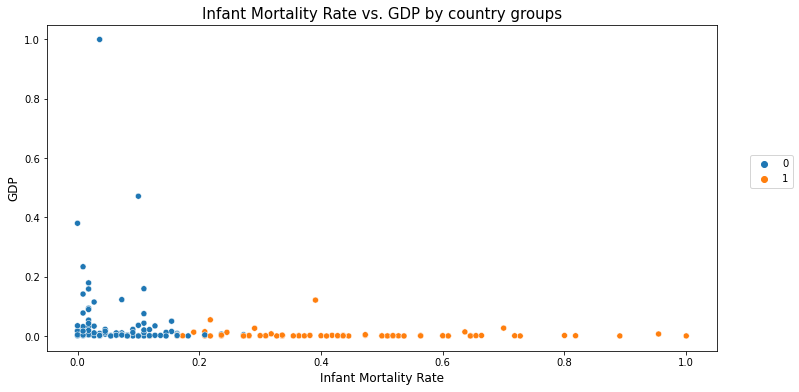

In [112]:
# Scatter plot for Infant Mortality Rate and GDP
plt.figure(figsize = (12,6))
sns.scatterplot(x = data_scaled_df.loc[:,'Infant Mortality Rate'], y = data_scaled_df.loc[:,'GDP'], hue = pred_kmeans)
plt.xlabel('Infant Mortality Rate', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.title(label='Infant Mortality Rate vs. GDP by country groups', fontsize=15)
plt.legend(loc = (1.05,0.5))
plt.show()

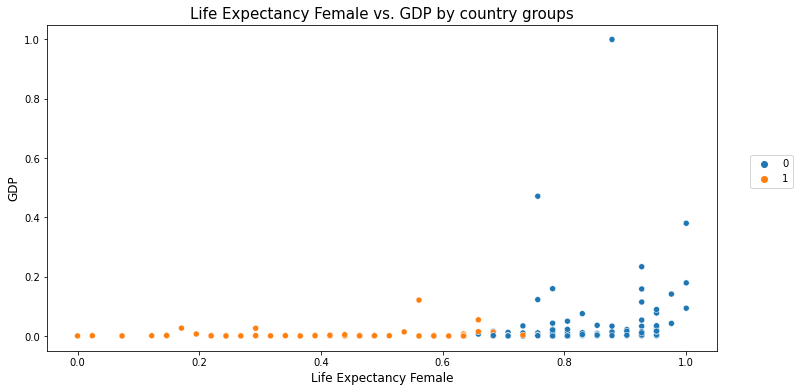

In [113]:
# Scatter plot for Life Expectancy Female and GDP
plt.figure(figsize = (12,6))
sns.scatterplot(x = data_scaled_df.loc[:,'Life Expectancy Female'], y = data_scaled_df.loc[:,'GDP'], hue = pred_kmeans)
plt.xlabel('Life Expectancy Female', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.title(label='Life Expectancy Female vs. GDP by country groups', fontsize=15)
plt.legend(loc = (1.05,0.5))
plt.show()

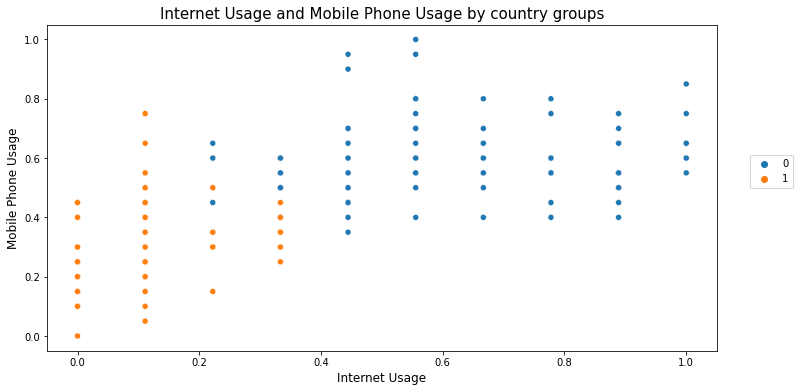

In [114]:
# Scatter plot for Internet Usage and Mobile Phone Usage
plt.figure(figsize = (12,6))
sns.scatterplot(x = data_scaled_df.loc[:,'Internet Usage'], y = data_scaled_df.loc[:,'Mobile Phone Usage'], hue = pred_kmeans)
plt.xlabel('Internet Usage', fontsize=12)
plt.ylabel('Mobile Phone Usage', fontsize=12)
plt.title(label='Internet Usage and Mobile Phone Usage by country groups', fontsize=15)
plt.legend(loc = (1.05, 0.5))
plt.show()

**Next, we will use `HIERARCHICAL` clustering method and show the dendrogram**

In [115]:
def hierarchial_clustering(df):
    
    k = 2 # as the number of clusters we are keeping as 2
    
    cluster = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward',compute_distances=True)  
    
    pred_hie = cluster.fit_predict(df) # Predict cluster index for each data point
    return pred_hie

# Performing Agglomerative Clustering on the data
pred_hie = hierarchial_clustering(data_scaled_df)
print(pred_hie)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1]


**Next, we will give a detailed list of all the groups and the countries included within the groups based on hierarchical method**

In [116]:
group_country_1 = list(world_indicators[pred_hie == 0]['Country'])
group_country_2 = list(world_indicators[pred_hie == 1]['Country'])

print('group_country_1:', group_country_1)
print('*'*110)
print('group_country_2:', group_country_2)

group_country_1: ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Djibouti', 'Egypt, Arab Rep.', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia, The', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Swaziland', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'India', 'Indonesia', 'Kyrgyz Republic', 'Lao PDR', 'Mongolia', 'Nepal', 'Pakistan', 'Philippines', 'Sri Lanka', 'Tajikistan', 'Timor-Leste', 'Uzbekistan', 'Iran, Islamic Rep.', 'Iraq', 'Jordan', 'Yemen, Rep.', 'Fiji', 'Kiribati', 'Micronesia, Fed. Sts.', 'Papua New Guinea', 'Solomon Islands', 'Tonga', 'Vanuatu', 'Belize', 'Bolivia', 'Ecuador', 'El Sa

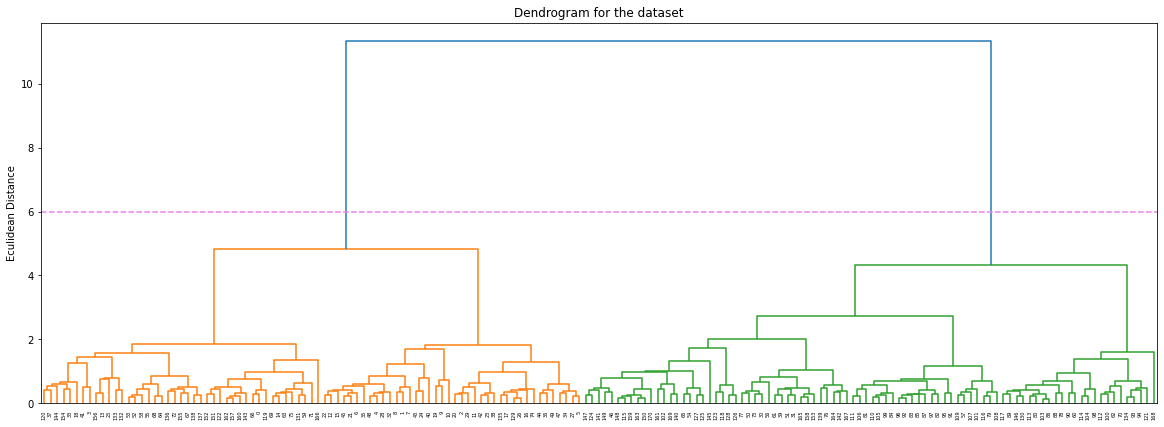

In [117]:
import scipy.cluster.hierarchy as shc 
import sklearn.cluster as sc

linked_data = shc.linkage(data_scaled_df.values,'ward',metric='euclidean')
plt.figure(figsize=(20,7))
shc.dendrogram(linked_data,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram for the dataset')
plt.ylabel('Eculidean Distance')
plt.axhline(y=6, color='violet', linestyle='--')
plt.show()

Last, we generate three Scatter plots of three pairs of attributes: 
- Infant Mortality Rate and GDP
- Life Expectancy Female and GDP
- Internet Usage and Mobile Phone Usage

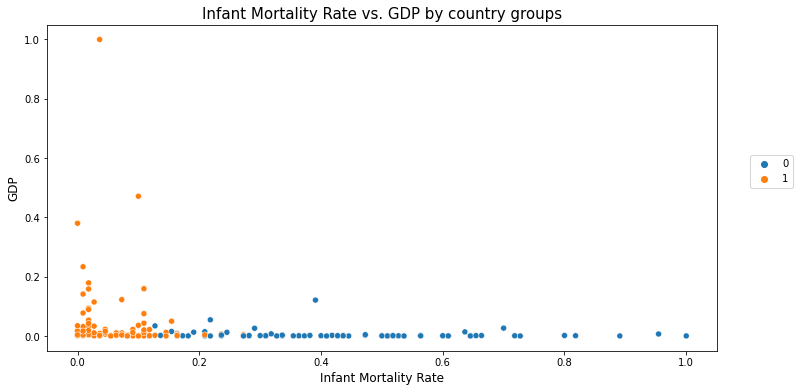

In [118]:
# Scatter plot for Infant Mortality Rate and GDP
plt.figure(figsize = (12,6))
sns.scatterplot(x = data_scaled_df.loc[:,'Infant Mortality Rate'], y = data_scaled_df.loc[:,'GDP'], hue = pred_hie)
plt.xlabel('Infant Mortality Rate', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.title(label='Infant Mortality Rate vs. GDP by country groups', fontsize=15)
plt.legend(loc = (1.05,0.5))
plt.show()

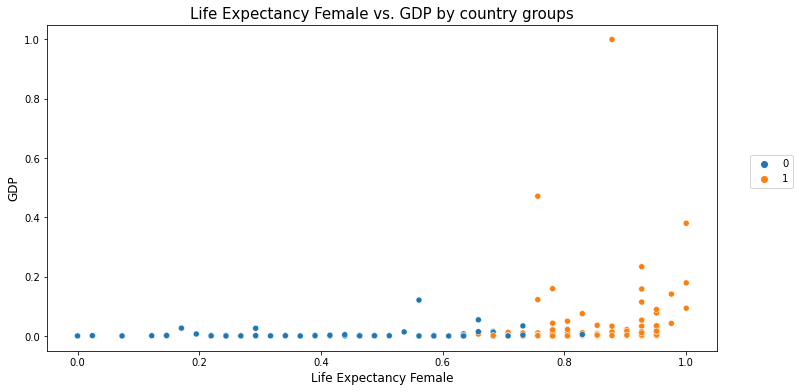

In [119]:
# Scatter plot for Life Expectancy Female and GDP
plt.figure(figsize = (12,6))
sns.scatterplot(x = data_scaled_df.loc[:,'Life Expectancy Female'], y = data_scaled_df.loc[:,'GDP'], hue = pred_hie)
plt.xlabel('Life Expectancy Female', fontsize=12)
plt.ylabel('GDP', fontsize=12)
plt.title(label='Life Expectancy Female vs. GDP by country groups', fontsize=15)
plt.legend(loc = (1.05,0.5))
plt.show()

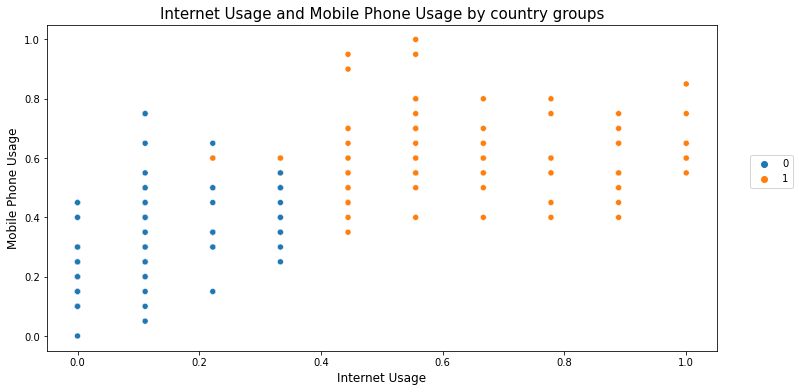

In [120]:
# Scatter plot for Internet Usage and Mobile Phone Usage
plt.figure(figsize = (12,6))
sns.scatterplot(x = data_scaled_df.loc[:,'Internet Usage'], y = data_scaled_df.loc[:,'Mobile Phone Usage'], hue = pred_hie)
plt.xlabel('Internet Usage', fontsize=12)
plt.ylabel('Mobile Phone Usage', fontsize=12)
plt.title(label='Internet Usage and Mobile Phone Usage by country groups', fontsize=15)
plt.legend(loc = (1.05, 0.5))
plt.show()